Материалы: 
* Макрушин С.В. Лекция 13: Dask DataFrame
* https://docs.dask.org/en/latest/dataframe.html
* Jesse C. Daniel. Data Science with Python and Dask. 

## Задачи для совместного разбора

1. Считать данные из файлов в каталоге `accounts`. Содержат ли какие-либо из столбцов пропуски?

In [1]:
import dask.dataframe as dd

In [2]:
accounts = dd.read_csv('./accounts/accounts.*.csv',
                      dtype={'amount':'float64',
                            'id':'int64',
                            'names':'object'})
accounts

,id,names,amount
npartitions=3,,,
,int64,object,float64
,...,...,...
,...,...,...
,...,...,...


In [3]:
accounts.isna().sum().compute()

id        0
names     0
amount    3
dtype: int64

2. Подсчитать количество раз, которое то или иное имя встретилось в выборке. Вывести самое часто встречающееся имя.

In [4]:
%%time
accounts['names'].value_counts().compute()

CPU times: user 1.3 s, sys: 248 ms, total: 1.55 s
Wall time: 911 ms


Norbert     188147
Alice       185892
George      183249
Tim         162432
Bob         157065
Michael     148372
Ingrid      132067
Oliver      121907
Quinn       118071
Wendy       110657
Charlie     109236
Ursula      108745
Hannah      108632
Ray         108610
Sarah       104781
Victor      102656
Frank        99984
Laura        97216
Jerry        96378
Xavier       94445
Edith        89991
Zelda        89047
Kevin        84784
Dan          73293
Patricia     62881
Yvonne       61462
Name: names, dtype: int64

In [5]:
%%time
accounts.groupby('names')['amount'].sum().compute()
accounts.groupby('names')['amount'].mean().compute()

CPU times: user 2.61 s, sys: 523 ms, total: 3.13 s
Wall time: 1.61 s


names
Alice        651.642077
Bob          857.655499
Charlie     1745.577526
Dan          920.095002
Edith       1048.074585
Frank       1329.394553
George       935.259292
Hannah      1234.223967
Ingrid      1229.990035
Jerry        513.231526
Kevin       1089.550393
Laura       1985.839851
Michael     2642.594553
Norbert      754.775107
Oliver       400.505664
Patricia     935.283520
Quinn       1232.199880
Ray          505.220709
Sarah        798.997337
Tim         1019.603656
Ursula       339.521881
Victor       756.277665
Wendy        784.367351
Xavier      1787.366944
Yvonne       405.667128
Zelda        700.779296
Name: amount, dtype: float64

In [6]:
import dask

In [7]:
%%time
dask.compute(accounts.groupby('names')['amount'].sum().compute(),
            accounts.groupby('names')['amount'].mean().compute())

CPU times: user 2.76 s, sys: 556 ms, total: 3.32 s
Wall time: 1.77 s


(names
 Alice       121135049.0
 Bob         134707661.0
 Charlie     190678161.0
 Dan          67436523.0
 Edith        94317280.0
 Frank       132918185.0
 George      171385330.0
 Hannah      134076218.0
 Ingrid      162441094.0
 Jerry        49464228.0
 Kevin        92375351.0
 Laura       193055407.0
 Michael     392087039.0
 Norbert     142008672.0
 Oliver       48824444.0
 Patricia     58811563.0
 Quinn       145487072.0
 Ray          54871516.0
 Sarah        83719740.0
 Tim         165616261.0
 Ursula       36921307.0
 Victor       77636440.0
 Wendy        86795738.0
 Xavier      168807871.0
 Yvonne       24933113.0
 Zelda        62402294.0
 Name: amount, dtype: float64,
 names
 Alice        651.642077
 Bob          857.655499
 Charlie     1745.577526
 Dan          920.095002
 Edith       1048.074585
 Frank       1329.394553
 George       935.259292
 Hannah      1234.223967
 Ingrid      1229.990035
 Jerry        513.231526
 Kevin       1089.550393
 Laura       1985.839851
 Mich

3. Создать новую колонку, которая является результатом от деления значения `amount` нацело на 100, если `amount` > 100, и нулём в противном случае.

In [3]:
def f(x):
    if x > 100:
        return x // 100
    return 0

accounts['new_column'] = accounts['amount'].map(f)
accounts.head()

,id,names,amount,new_column
0,39,Victor,205.0,2.0
1,289,Hannah,87.0,0.0
2,234,Victor,1820.0,18.0
3,155,Ray,-600.0,0.0
4,266,Ray,572.0,5.0


## Лабораторная работа 13

__При решении данных задач не подразумевается использования других коллекций, кроме `dask.DataFrame`, если в задании явно не указано обратное.__

In [3]:
import dask.dataframe as dd
import pandas as pd
import dask.bag as db
import json
import dask

1. В архиве `recipes_full.zip` находятся файлы, содержащие информацию об рецептах блюд. Загрузите данные из файлов этого архива в виде `dd.DataFrame` с названием `recipes`. Укажите, что в столбце `submitted` содержатся даты.

In [4]:
recipes = dd.read_csv('./data/recipes_full/recipes_full_*.csv',
                      dtype={'id':'int64',
                             'name':'object', 
                             'minutes': 'float64',
                             'n_steps': 'float64'})

recipes['submitted'] = dd.to_datetime(recipes['submitted'])
recipes

# id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
npartitions=16,,,,,,,,
,int64,object,float64,int64,datetime64[ns],float64,object,int64
,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...


In [9]:
recipes.head()

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,683970,vant ivoire mickies nothing,33,803776,2019-08-22,4,pat and gina neely and their family own and op...,9
1,1089012,kremsils mariposa baccala cookies class borage...,23,51579,2013-03-02,1,"a light, tasty and easy to put together chicke...",5
2,1428572,tania lander,0,68884,1980-11-09,1,a delicious melt in your mouth appetizer. for ...,5
3,1400250,heloise milli asher doogh zojirushi,24,678862,2018-04-29,3,delicious cream cheese and peach filled cresce...,1
4,387709,nutty chocolate chunk cookies,47,489552,2009-08-31,8,everyone loves these buttery cookies chock ful...,10


2. Выведите метаинформацию о таблице: `npartitions` и типы столбцов.

In [46]:
recipes.npartitions

16

In [60]:
recipes.dtypes

id                         int64
name                      object
minutes                  float64
contributor_id             int64
submitted         datetime64[ns]
n_steps                  float64
description               object
n_ingredients              int64
dtype: object

3. Выведите на экран 5 первых строк таблицы. Выведите на экран 5 последних строк таблицы. В случае сообщения об ошибки объясните причину и исправьте ошибку.

In [20]:
recipes.head(5)

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,683970,vant ivoire mickies nothing,33,803776,2019-08-22,4,pat and gina neely and their family own and op...,9
1,1089012,kremsils mariposa baccala cookies class borage...,23,51579,2013-03-02,1,"a light, tasty and easy to put together chicke...",5
2,1428572,tania lander,0,68884,1980-11-09,1,a delicious melt in your mouth appetizer. for ...,5
3,1400250,heloise milli asher doogh zojirushi,24,678862,2018-04-29,3,delicious cream cheese and peach filled cresce...,1
4,387709,nutty chocolate chunk cookies,47,489552,2009-08-31,8,everyone loves these buttery cookies chock ful...,10


In [89]:
recipes.tail()

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
44011,1029131,tuti waffle snackies steakhouse,19.0,171345,1973-10-18,4.0,"according to a providence journal article, ama...",4
44012,1700703,noelias cheats crocante fleisch zitumbuwa,1.0,30228,2007-07-01,6.0,if possible sauté the onions and garlic in abo...,1
44013,1910650,rubbed restuffed pelmeni bedouin flavourful,60.0,591905,2009-09-26,3.0,another great recipe to add to the growing swe...,2
44014,713836,stems polpettine peezi,NaN,357389,2003-09-30,4.0,adapted from top secret recipes. love this!,9
44015,660699,clementines,64.0,29196,1973-06-03,6.0,this would make a great start to your holiday ...,8


4. Посчитайте, сколько строк содержит каждый из блоков (partitions).

In [51]:
recipes.map_partitions(len).compute()

0     237505
1      41450
2     235222
3      43733
4     238139
5      40816
6     234750
7      44205
8     237887
9      41068
10    234486
11     44468
12    238298
13     40656
14    234938
15     44016
dtype: int64

5. Найдите максимум в столбце `n_steps`. Визуализируйте граф вычислений для этой задачи. Прокомментируйте логику работы `dask` при решении данной задачи.

In [5]:
recipes.n_steps.max().compute()

145.0

In [6]:
m = recipes.n_steps.max()

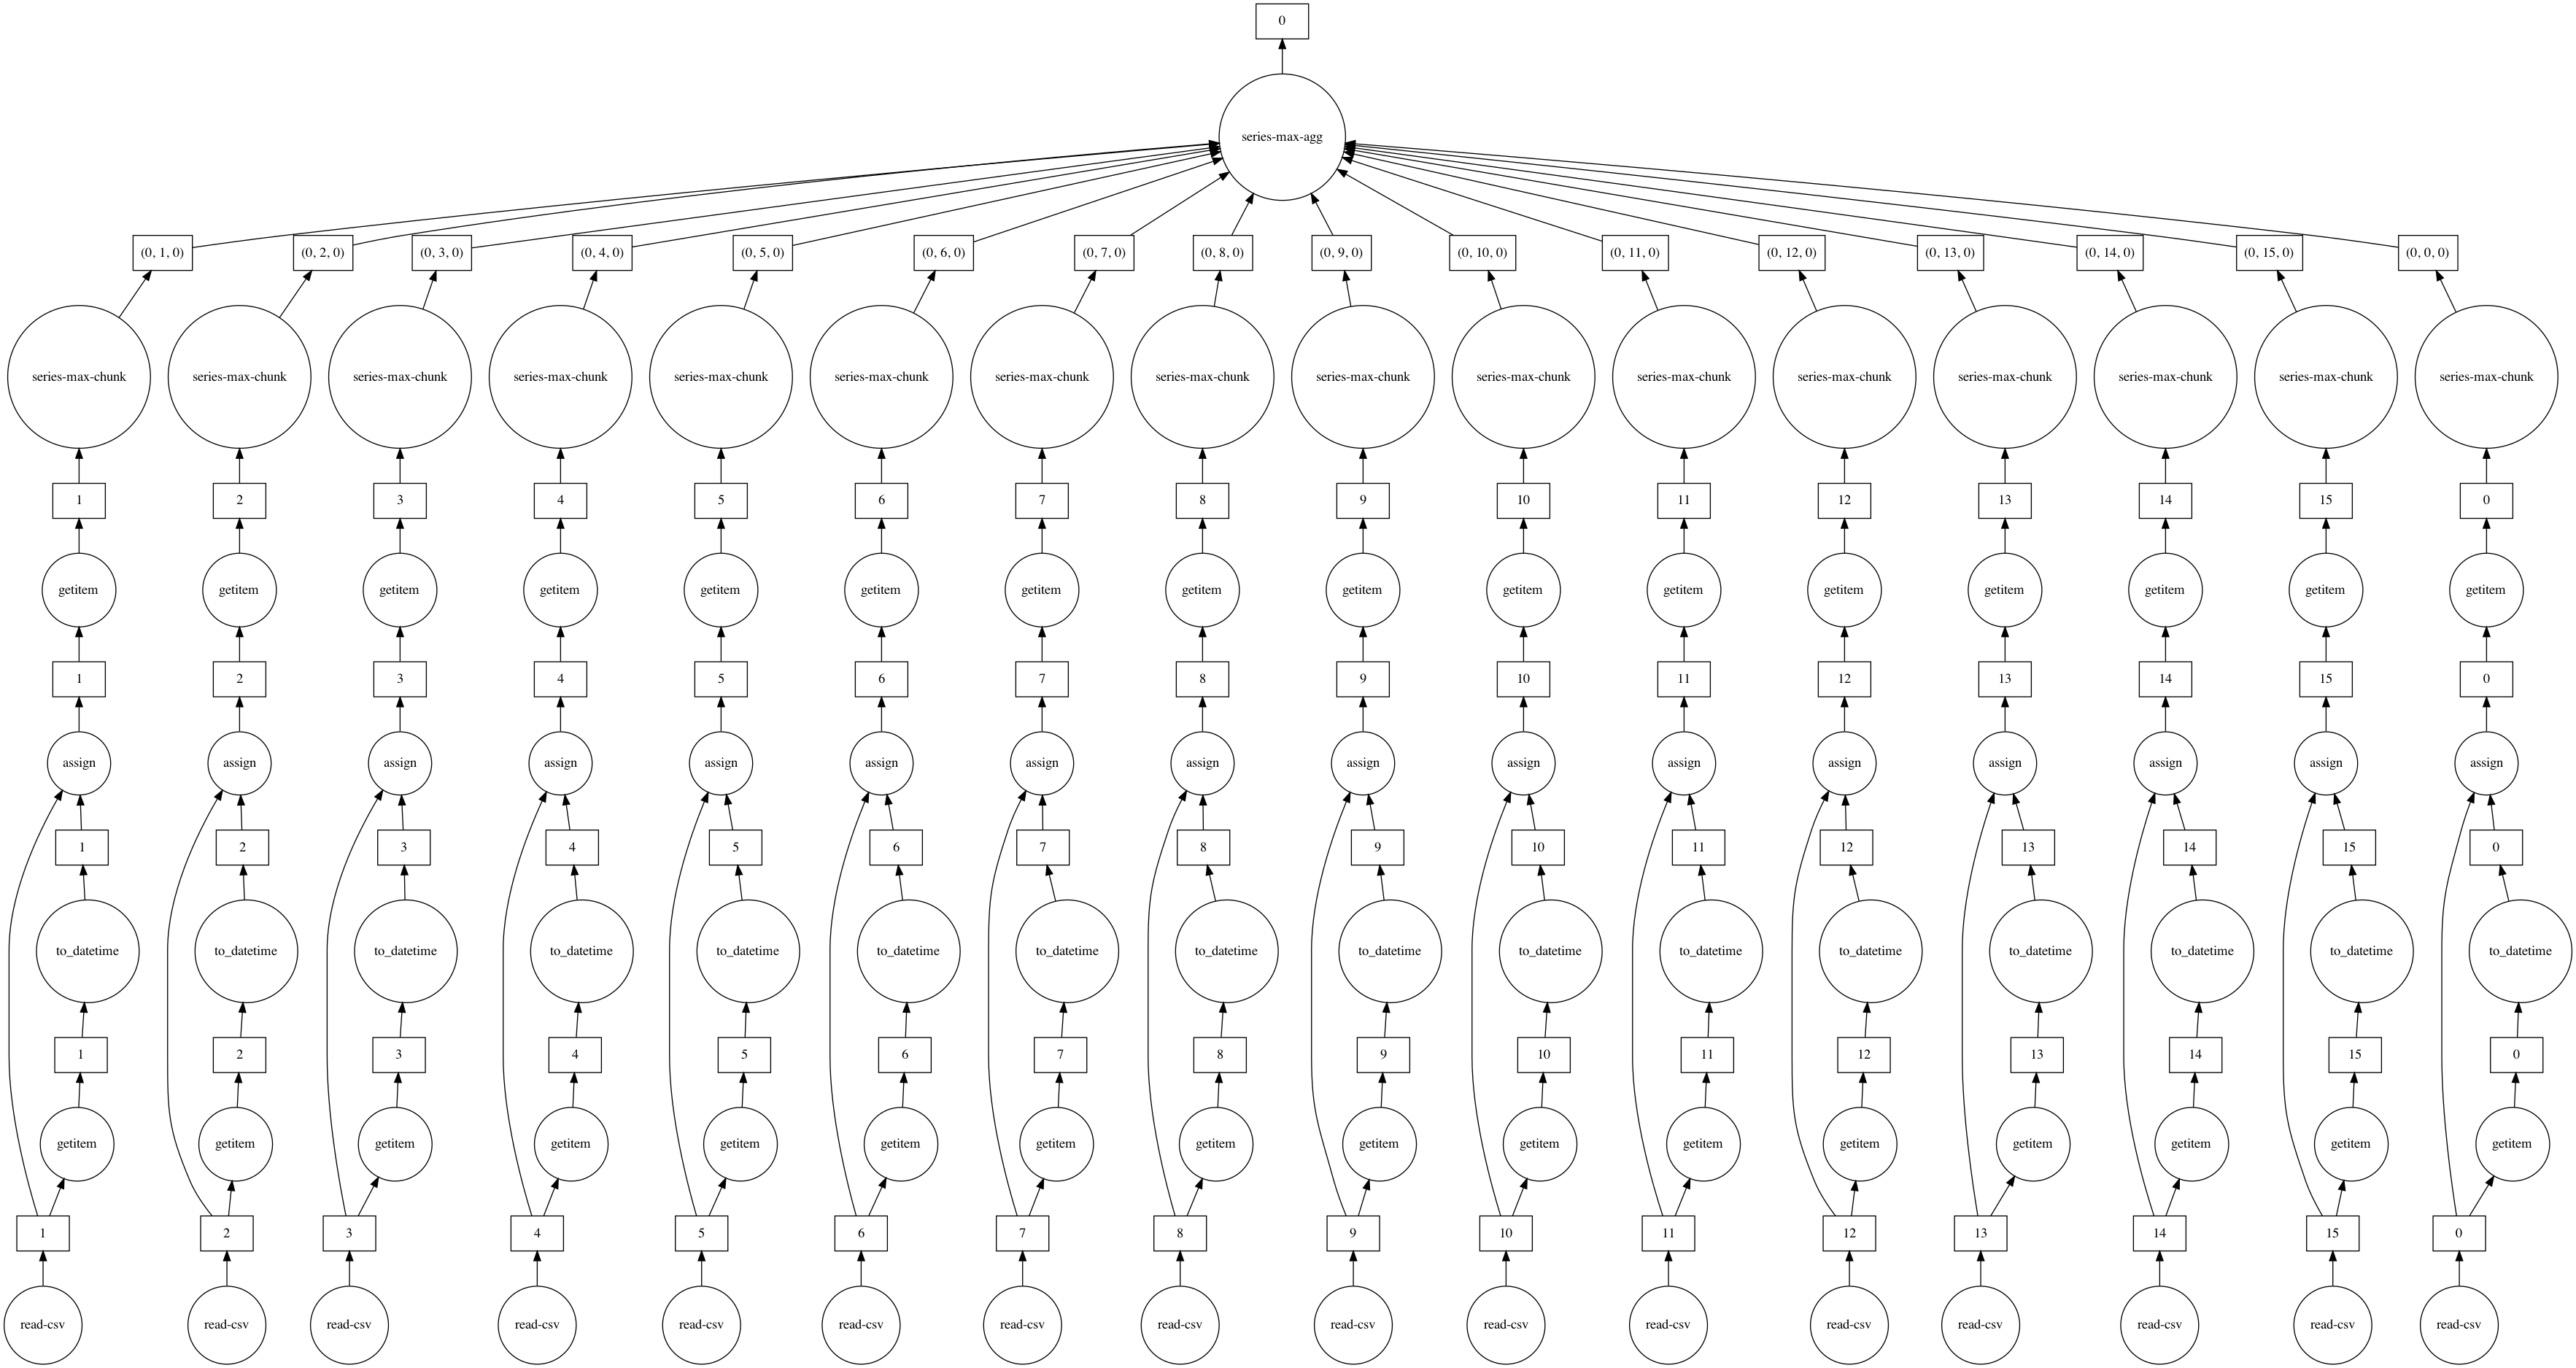

In [8]:
m.visualize()

Dask сначала ищет максимальное число в каждом из 16 кусочков, затем из полученных результатов снова находит максимальное значение и выводит его в ответ

6. Посчитайте количество рецептов с группировкой по месяцам добавления отзыва в базу.

In [79]:
recipes_count = pd.Series(recipes['submitted'].groupby(recipes['submitted'].dt.month).count().compute())
recipes_count

submitted
1     193363
2     173834
3     192389
4     186049
5     192487
6     184205
7     189337
8     187276
9     181081
10    187018
11    180974
12    183624
Name: submitted, dtype: int64

7. Считайте файлы из архива `reviews_full.zip` (__ЛР12__) в виде `dask.bag`. Пользуясь результатом лабораторной работы 12, рассчитайте среднее значение оценок отзывов с группировкой по месяцам. После завершения всех вычислений преобразуйте результат к `pd.Series`.

In [81]:
import re

In [82]:
reviews = dd.read_csv('../12_dask_bag/data/reviews_full_result/reviews_full_result*.csv',
                      dtype={'user_id':'int64',
                             'recipe_id':'int64', 
                             'review': 'object',
                             'rating': 'int64'})

reviews['date'] = dd.to_datetime(reviews['date'])
reviews

,Unnamed: 0,user_id,recipe_id,date,review,rating
npartitions=7,,,,,,
,int64,int64,int64,datetime64[ns],object,int64
,...,...,...,...,...,...
...,...,...,...,...,...,...
,...,...,...,...,...,...
,...,...,...,...,...,...


In [17]:
reviews.head()

,Unnamed: 0,user_id,recipe_id,date,review,rating
0,0,452355,292657,2016-05-08,WOW!!! This is the best. I have never been abl...,0
1,1,329304,433404,2006-06-14,This was good but the dressing needed somethin...,0
2,2,227932,2008187,1985-11-19,"Very good,it was a hit for my family. I used 6...",0
3,3,171468,270716,2019-05-21,Made for ZWT-8 Family Picks after I saw these ...,0
4,4,91392,1159916,1972-09-18,Very nice slaw. I especially like that it does...,0


In [84]:
mean_rating = pd.Series(reviews.groupby(reviews.date.dt.month).rating.mean().compute())
mean_rating

date
1     1.280571
2     1.268555
3     1.264826
4     1.273440
5     1.277352
6     1.260078
7     1.267794
8     1.268248
9     1.278280
10    1.277824
11    1.267392
12    1.265511
Name: rating, dtype: float64

8. Пользуясь результатами решения задач 6 и 7, создайте `pd.DataFrame`, содержащий два столбца: `mean_rating`, `recipes_count`

In [85]:
result = pd.DataFrame()

In [86]:
result['recipes_count'] = recipes_count

In [87]:
result['mean_rating'] = mean_rating

In [88]:
result

,recipes_count,mean_rating
submitted,,
1,193363,1.280571
2,173834,1.268555
3,192389,1.264826
4,186049,1.273440
5,192487,1.277352
6,184205,1.260078
7,189337,1.267794
8,187276,1.268248
9,181081,1.278280
